# <b>Implementing Linear Regression with Batch Gradient Descent from Scratch</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
data = np.loadtxt('ex1data1.txt', delimiter=',')

x_train = data[:,0] # population of a given city
y_train = data[:,1] # profit of a restaurant in that city

In [3]:
x_train[:5] 

array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598])

In [4]:
y_train[:5] 

array([17.592 ,  9.1302, 13.662 , 11.854 ,  6.8233])

In [5]:
x_train.shape

(97,)

In [6]:
y_train.shape

(97,)

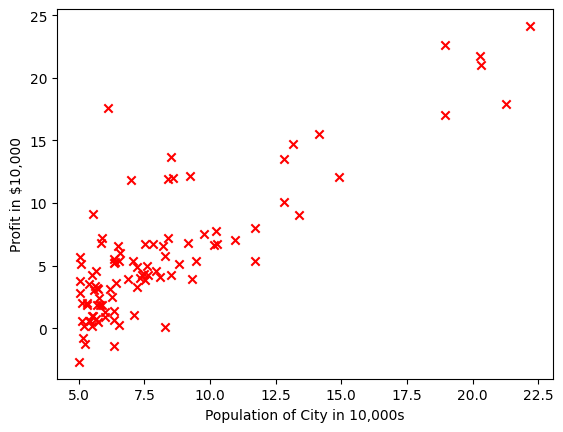

In [7]:
plt.scatter(x_train, y_train, marker='x', c='r')

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')
plt.show()

#### <b>Implementing the squared error cost function</b>

In [8]:
def compute_cost(x, y, w, b):
    """
    computes the final cost given x, y, w(1 variable) and b
    """
    m = x.shape[0]
    total_cost = 0

    for i in range(m):
        y_hat_i = w * x[i] + b
        cost_i = (y_hat_i - y[i]) ** 2
        total_cost += cost_i
    
    final_cost = total_cost / (2 * m)
    
    return final_cost

#### <b>Implementing a function to calculate the derivatives in gradient descent</b>

In [9]:
def compute_derivative(x, y, w, b):
    """
    computes the derivative terms dj_dw and dj_db(these set the gradient) of gradient descent
    """

    m = x.shape[0]

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        y_hat_i = w * x[i] + b
        dj_dw_i = (y_hat_i - y[i]) * x[i]
        dj_db_i = (y_hat_i - y[i])

        dj_dw += dj_dw_i
        dj_db += dj_db_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

#### <b>Implementing batch gradient descent function</b>

In [10]:
def gradient_descent(x, y, w_init, b_init, cal_cost, cal_derivative, alpha, num_iters):
    """
    performs batch gradient descent to find the optimal values of w and b (these parameters are also called theta)
    """
    
    w = copy.deepcopy(w_init) # since this function changes the values of w_init with each iteration, we make a copy so as to not alter the original
    b = b_init # as b is a scalar and scalars are immutable in python there is no need to make a copy

    for i in range(num_iters):
        dj_dw, dj_db = cal_derivative(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 100 == 0:
            cost = cal_cost(x, y, w, b)
            print(f"Iteration {i}, Cost {round(cost,2)}")
    
    return w, b

In [11]:
initial_w = 0
initial_b = 0

iterations = 10000
alpha = 0.01

w, b = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_derivative, alpha, iterations)

Iteration 0, Cost 6.74
Iteration 100, Cost 5.48
Iteration 200, Cost 5.17
Iteration 300, Cost 4.96
Iteration 400, Cost 4.82
Iteration 500, Cost 4.71
Iteration 600, Cost 4.64
Iteration 700, Cost 4.59
Iteration 800, Cost 4.56
Iteration 900, Cost 4.53
Iteration 1000, Cost 4.52
Iteration 1100, Cost 4.5
Iteration 1200, Cost 4.5
Iteration 1300, Cost 4.49
Iteration 1400, Cost 4.49
Iteration 1500, Cost 4.48
Iteration 1600, Cost 4.48
Iteration 1700, Cost 4.48
Iteration 1800, Cost 4.48
Iteration 1900, Cost 4.48
Iteration 2000, Cost 4.48
Iteration 2100, Cost 4.48
Iteration 2200, Cost 4.48
Iteration 2300, Cost 4.48
Iteration 2400, Cost 4.48
Iteration 2500, Cost 4.48
Iteration 2600, Cost 4.48
Iteration 2700, Cost 4.48
Iteration 2800, Cost 4.48
Iteration 2900, Cost 4.48
Iteration 3000, Cost 4.48
Iteration 3100, Cost 4.48
Iteration 3200, Cost 4.48
Iteration 3300, Cost 4.48
Iteration 3400, Cost 4.48
Iteration 3500, Cost 4.48
Iteration 3600, Cost 4.48
Iteration 3700, Cost 4.48
Iteration 3800, Cost 4.48


In [12]:
w

np.float64(1.1930336383584828)

In [13]:
b

np.float64(-3.895780820268237)

In [14]:
m = x_train.shape[0]

predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

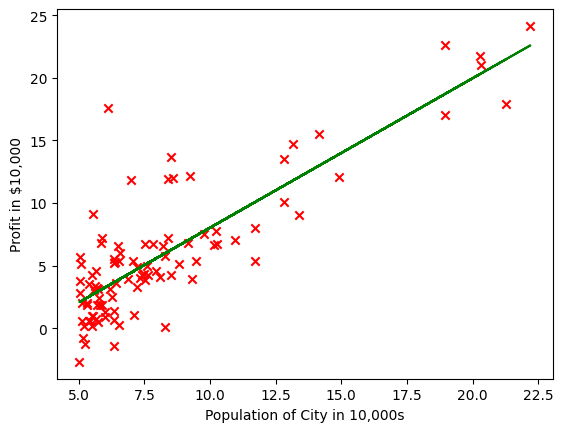

In [15]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.plot(x_train, predicted, c='g')

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')
plt.show()

In [16]:
predict1 = 3.5 * w + b
print('For population = 35,000, the algorithm predicts a profit of $%.2f' % (predict1*10000))

For population = 35,000, the algorithm predicts a profit of $2798.37


In [17]:
predict2 = 7.0 * w + b
print('For population = 70,000, the algorithm predict a profit of $%.2f' % (predict2*10000))

For population = 70,000, the algorithm predict a profit of $44554.55
